In [1]:
#Let's take some of my thesis data and cluster it.
#The problem we are fundamentally trying to solve is to distinguish the subjective 'unripe', 'ripe', and 'spoiled' 
#states for bananas

import numpy as np
import pandas as pd
#from sklearn import decomposition
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances_argmin

#Read in data
data = pd.read_excel('clustering_thesis_data.xlsx')

#Drop the 'y' column - let's do this unsupervised
data.drop('Shelf-Life', axis = 1, inplace = True)

print(data)


     Hue Avg  Hue Min  Hue Max      %G     %Y     %B    a   a Min   a Max
0       23.2        8       29    0.00  45.60  73.93  4.7  -5.670  15.320
1       24.5       10       29    0.00  58.54  54.00  3.7  -1.700  15.120
2       26.2       16       30    0.04  86.64  20.56  2.1  -1.800  13.500
3       27.1       12       30    0.21  98.44   4.47  1.2  -1.200  16.600
4       27.3       17       31    0.10  99.82   0.63  1.0  -1.600   8.000
5       22.7        0       50    0.36  37.85  74.74  4.7  -5.340  14.920
6       25.3       12       30    0.10  70.81  39.82  3.0  -1.560  16.000
7       27.0       22       31    0.32  99.37   4.62  1.3  -2.050   7.230
8       27.5       20       31    2.22  99.92   0.65  0.9  -2.370   3.860
9       28.2       21       32   11.20  99.60   0.09  0.2  -3.020   8.800
10      23.6       11       22    0.05  43.12  70.27  4.6  -2.790  12.896
11      24.5       13       28    0.00  52.95  65.10  3.7   0.150  12.950
12      25.5       12       30    0.00

In [2]:
#Previous thesis work showed that these three features are the best indicators of shelf-life
x = data[['Hue Avg', '%G',  'a']]
X = x.as_matrix()
print(X)

[[  2.32000000e+01   0.00000000e+00   4.70000000e+00]
 [  2.45000000e+01   0.00000000e+00   3.70000000e+00]
 [  2.62000000e+01   4.00000000e-02   2.10000000e+00]
 [  2.71000000e+01   2.10000000e-01   1.20000000e+00]
 [  2.73000000e+01   1.00000000e-01   1.00000000e+00]
 [  2.27000000e+01   3.60000000e-01   4.70000000e+00]
 [  2.53000000e+01   1.00000000e-01   3.00000000e+00]
 [  2.70000000e+01   3.20000000e-01   1.30000000e+00]
 [  2.75000000e+01   2.22000000e+00   9.00000000e-01]
 [  2.82000000e+01   1.12000000e+01   2.00000000e-01]
 [  2.36000000e+01   5.00000000e-02   4.60000000e+00]
 [  2.45000000e+01   0.00000000e+00   3.70000000e+00]
 [  2.55000000e+01   0.00000000e+00   2.80000000e+00]
 [  2.69000000e+01   4.00000000e-02   1.40000000e+00]
 [  2.70000000e+01   4.00000000e-02   1.20000000e+00]
 [  2.71000000e+01   1.00000000e-01   1.30000000e+00]
 [  2.77000000e+01   1.43000000e+00   5.00000000e-01]
 [  2.33000000e+01   0.00000000e+00   5.00000000e+00]
 [  2.52000000e+01   0.00000

In [9]:
#Let's cluster!
#We know we want three states ('ripe', 'unripe', and 'spoiled')

nclusters = 3
km = KMeans(init = 'k-means++', n_clusters = 3)
km.fit(X)

fig = plt.figure(figsize=(8, 3))
#fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4E9A06', '#FF9C34', '#8B4513']

# We want to have the same colors for the same cluster from the
# MiniBatchKMeans and the KMeans algorithm. Let's pair the cluster centers per
# closest one.
k_means_cluster_centers = np.sort(km.cluster_centers_, axis=0)
print(k_means_cluster_centers)
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)

[[ 25.57282609   2.46178261  -5.5525    ]
 [ 29.68636364  43.99954545  -0.94545455]
 [ 36.437625    97.233875     2.4951087 ]]


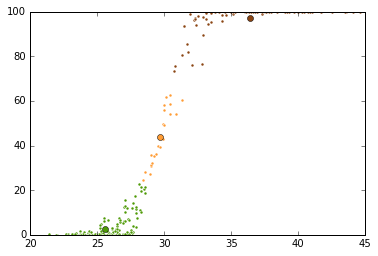

In [10]:
#Let's visualize our clusters
%matplotlib inline
#ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(nclusters+1), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)


In [ ]:
#Great! We have clustered the data to the three states we want